In [1]:
import numpy as np
import pandas as pd
import scripts as sc
import matplotlib.pyplot as plt

prefix = 'r'

pd.set_option('display.max_rows', 500)
idxFigure = 1

## Abertura dos arquivos

In [2]:
dataAnswers = pd.read_csv('data/{}/Answers.csv'.format(prefix), encoding='latin-1')
dataQuestions = pd.read_csv('data/{}/Questions.csv'.format(prefix), encoding='latin-1')
dataTags = pd.read_csv('data/{}/Tags.csv'.format(prefix))

len(dataAnswers), len(dataQuestions), len(dataTags)

(250788, 189930, 319375)

## Remover todos os valores nulos do conjunto de dados

In [3]:
dataAnswers = dataAnswers.dropna()
dataQuestions = dataQuestions.dropna()
dataTags = dataTags.dropna()

len(dataAnswers), len(dataQuestions), len(dataTags)

(250000, 188729, 319212)

## Informações sobre os conjuntos de dados

In [4]:
dataAnswers.info(), dataQuestions.info(), dataTags.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250000 entries, 0 to 250787
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                250000 non-null  int64  
 1   OwnerUserId       250000 non-null  float64
 2   CreationDate      250000 non-null  object 
 3   ParentId          250000 non-null  int64  
 4   Score             250000 non-null  int64  
 5   IsAcceptedAnswer  250000 non-null  bool   
 6   Body              250000 non-null  object 
dtypes: bool(1), float64(1), int64(3), object(2)
memory usage: 13.6+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 188729 entries, 0 to 189929
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Id            188729 non-null  int64  
 1   OwnerUserId   188729 non-null  float64
 2   CreationDate  188729 non-null  object 
 3   Score         188729 non-null  int64  
 4   Title  

(None, None, None)

## Adição das colunas: ano, mes e dia

In [5]:
dateQuestion = sc.getDateFormat(dataQuestions['CreationDate'].values)
dateAnswer = sc.getDateFormat(dataAnswers['CreationDate'].values)

dataQuestions['ano'] = dateQuestion[0][0][0]
dataQuestions['mes'] = dateQuestion[0][0][1]
dataQuestions['dia'] = dateQuestion[0][0][2]

dataAnswers['ano'] = dateAnswer[0][0][0]
dataAnswers['mes'] = dateAnswer[0][0][1]
dataAnswers['dia'] = dateAnswer[0][0][2]

## Tamanho dos conjuntos por ano

In [6]:
print('\t\tQuestões:\t\tPerguntas:')
for ano in range(2008, 2016+1):
    print('ano: {}\ttamanho: {}\t\ttamanho: {}'.format(ano, len(dataQuestions.loc[(dataQuestions['ano'] == ano)]), len(dataAnswers.loc[(dataAnswers['ano'] == ano)])))

		Questões:		Perguntas:
ano: 2008	tamanho: 4		tamanho: 12
ano: 2009	tamanho: 455		tamanho: 1145
ano: 2010	tamanho: 2178		tamanho: 4541
ano: 2011	tamanho: 5604		tamanho: 10665
ano: 2012	tamanho: 11541		tamanho: 18173
ano: 2013	tamanho: 20651		tamanho: 30652
ano: 2014	tamanho: 29218		tamanho: 40050
ano: 2015	tamanho: 38388		tamanho: 49155
ano: 2016	tamanho: 42019		tamanho: 51928


## Total de questões para cada ano

In [7]:
dataQuestions['ano'].value_counts()

2016    42019
2017    38671
2015    38388
2014    29218
2013    20651
2012    11541
2011     5604
2010     2178
2009      455
2008        4
Name: ano, dtype: int64

## Estamos considerando que um usuário não novato (usuario veterano), os usuários do ano de 2008 e 2009, já que no ano de 2008 há apenas 4 questões.

In [8]:
veterans = dataQuestions.loc[(dataQuestions['ano'] == 2008) | (dataQuestions['ano'] == 2009) | (dataQuestions['ano'] == 2010), 'OwnerUserId'].unique().tolist()

len(veterans)

847

## Total de novatos nos anos

In [9]:
dataQuestions['Body'] = dataQuestions['Body'].str.lower()

In [10]:
valuesNotFound = [
    'esquisse',
    'BioConductor',
    'Shiny',
    'Lubridate',
    'Knitr',
    'Mlr',
    'Quanteda.dictionaries',
    'DT',
    'RCrawler',
    'Caret',
    'RMarkdown',
    'Leaflet',
    'Janitor',
    'Ggvis',
    'Plotly',
    'Rcharts',
    'Rbokeh',
    'Broom',
    'StringR',
    'Magrittr',
    'Slidify',
    'Rvest',
    'Future',
    'RMySQL',
    'RSQLite',
    'Prophet',
    'Glmnet',
    'Text2Vec',
    'SnowballC',
    'Quantmod',
    'Rstan',
    'Swirl',
    'DataScienceR',
    'mlr3',
    'XGBoost',
    'vroom',
    'tidyxl',
    'dataExpolorer',
    'tsbox',
    'ymlthis',
    'officeR',
    'listviewer',
    'reactable',
    'echarts4r',
    'RColorBrewer',
    'paletteer',
    'tidygeocoder',
    'mapsapi',
    'googleanalyticsR',
    'dataCompareR',
    'CircStats',
    'DBI',
    'RPostgresSQL',
    'XLConnect',
]

In [11]:
data = []
repeatNewer = []
libTermsCategories = [
    # 42
    ['data-science', [
        ['dplyr'], 
        ['ggplot2'],    
        ['data.table'],
        ['tidyr'],
        ['ggraph'],
        ['tidyquant'],
        ['e1071'],
        ['xml'],
        ['purr'],
        ['readxl'],
        ['readr'],
        ['rio'],
        ['hmisc'],
        ['datapasta'],
        ['sqldf'],
        ['jsonlite'],
        ['httr'],
        ['splitstackshape'],
        ['validate'],
        ['testthat'],
        ['zoo'],
        ['remedy'],
        ['patchwork'],
        ['ggforce'],
        ['ggiraph'],
        ['taucharts'],
        ['sf'],
        ['tmap'],
        ['tmaptools'],
        ['albersusa'],
        ['glue'],
        ['roxygen2'],
        ['shinyjs'],
        ['flexdashboard'],
        ['openxlsx'],
        ['scales'],
        ['arrow'],
        ['fst'],
        ['devtools'],
        ['pacman'],
        ['plumber'],
        ['beepr'],
    ]],
    ['others', [
        ['data.table'],
        ['tidyr'],
        ['lattice'],
        ['odbc'],
        ['xlsx'],
        ['foreign'],
        ['haven']
    ]]
]

for libTerms in libTermsCategories:
    for libs in libTerms[1]:
        dataTopic = []
        newers = {}
        
        for lib in libs:
            dataQuestions['lib'] = dataQuestions['Body'].map(lambda val: val.count(lib)>0)
            
            if len(dataTopic) > 1:
                dataTopic.loc[dataTopic['lib'] == False, 'lib'] = dataQuestions.loc[dataQuestions['lib'] == True]
            else:
                dataTopic = dataQuestions.loc[dataQuestions['lib'] == True]

        for ano in range(min(dataQuestions['ano'])+1, max(dataQuestions['ano'])+1):
            dataAno = dataTopic.loc[dataTopic['ano'] == ano]

            if len(dataAno) < 1:

                for mes in range(1, 13):
                    data.append([libTerms[0], prefix, libs[0], ano, mes, 0])
            
            else:

                for mes in range(min(dataQuestions['mes']), max(dataQuestions['mes'])+1):
                    dataMes = dataAno.loc[dataAno['mes'] == mes]
                    qtdNewComers = 0

                    if len(dataMes) < 1:
                        data.append([libTerms[0], prefix, libs[0], ano, mes, qtdNewComers])
                    
                    else:
                        for question in dataMes.values:
                            
                            if question[1] not in veterans:
                                qtdNewComers += 1

                                if question[1] not in newers:
                                    newers[question[1]] = 1
                                else:
                                    newers[question[1]] += 1
                            
                        data.append([libTerms[0], prefix, libs[0], ano, mes, qtdNewComers])

        for newer in newers:
            repeatNewer.append([libTerms[0], prefix, libs[0], newer, newers[newer]])

dataLanguage = pd.DataFrame(data, columns=['Category', 'Language', 'Lib', 'Year', 'Month', 'NewCommers'])
dataNewerRepeat = pd.DataFrame(repeatNewer, columns=['Category', 'Language', 'Lib', 'Newer', 'Repeat'])

In [12]:
dataLanguage.to_csv(f'data/{prefix}/result.csv')
dataNewerRepeat.to_csv(f'data/{prefix}/result2.csv')

In [13]:
resultRepeat = []
resultNewers = []
labelRepeat = []

for libTerms in libTermsCategories:
    print(f'\n\tCATEGORIA: {libTerms[0]}\n')
    for terms in libTerms[1]:
        
        qtdTotal = dataLanguage.loc[dataLanguage['Lib'] == terms[0], 'NewCommers'].sum()

        if qtdTotal >= 1:
            print(f'Lib {terms[0]} tem {qtdTotal} novatos, e desses:')

            libMax = max(dataLanguage.loc[dataLanguage['Lib'] == terms[0], 'NewCommers'])
            print(f'\t> {libMax} foi a quantidade máxima de novatos em um mês!')

            newerMaxQuestions = max(dataNewerRepeat.loc[dataNewerRepeat['Lib'] == terms[0], 'Repeat'])
            print(f'\t> {newerMaxQuestions} foi a maior quantidade de perguntas feitas por um novato!\n\n')
        
            resultNewers.append(libMax)
            resultRepeat.append(newerMaxQuestions)
            labelRepeat.append(terms[0])
        else:
            print(f'Lib {terms[0]} nao tem novatos')


	CATEGORIA: data-science

Lib dplyr tem 7323 novatos, e desses:
	> 366 foi a quantidade máxima de novatos em um mês!
	> 46 foi a maior quantidade de perguntas feitas por um novato!


Lib ggplot2 tem 12153 novatos, e desses:
	> 338 foi a quantidade máxima de novatos em um mês!
	> 72 foi a maior quantidade de perguntas feitas por um novato!


Lib data.table tem 14678 novatos, e desses:
	> 223 foi a quantidade máxima de novatos em um mês!
	> 61 foi a maior quantidade de perguntas feitas por um novato!


Lib tidyr tem 2140 novatos, e desses:
	> 61 foi a quantidade máxima de novatos em um mês!
	> 21 foi a maior quantidade de perguntas feitas por um novato!


Lib ggraph tem 60 novatos, e desses:
	> 5 foi a quantidade máxima de novatos em um mês!
	> 4 foi a maior quantidade de perguntas feitas por um novato!


Lib tidyquant tem 8 novatos, e desses:
	> 3 foi a quantidade máxima de novatos em um mês!
	> 2 foi a maior quantidade de perguntas feitas por um novato!


Lib e1071 tem 448 novatos, e 

In [14]:
a = []
for idx in range(len(labelRepeat)):
    a.append([labelRepeat[idx], resultRepeat[idx], resultNewers[idx]])

dataResult = pd.DataFrame(a, columns=['lib', 'qtd_max_ptgn', 'qtd_max_newers'])

dataResult

,lib,qtd_max_ptgn,qtd_max_newers
0,dplyr,46,366
1,ggplot2,72,338
2,data.table,61,223
3,tidyr,21,61
4,ggraph,4,5
5,tidyquant,2,3
6,e1071,5,18
7,xml,13,82
8,purr,13,53
9,readxl,7,25


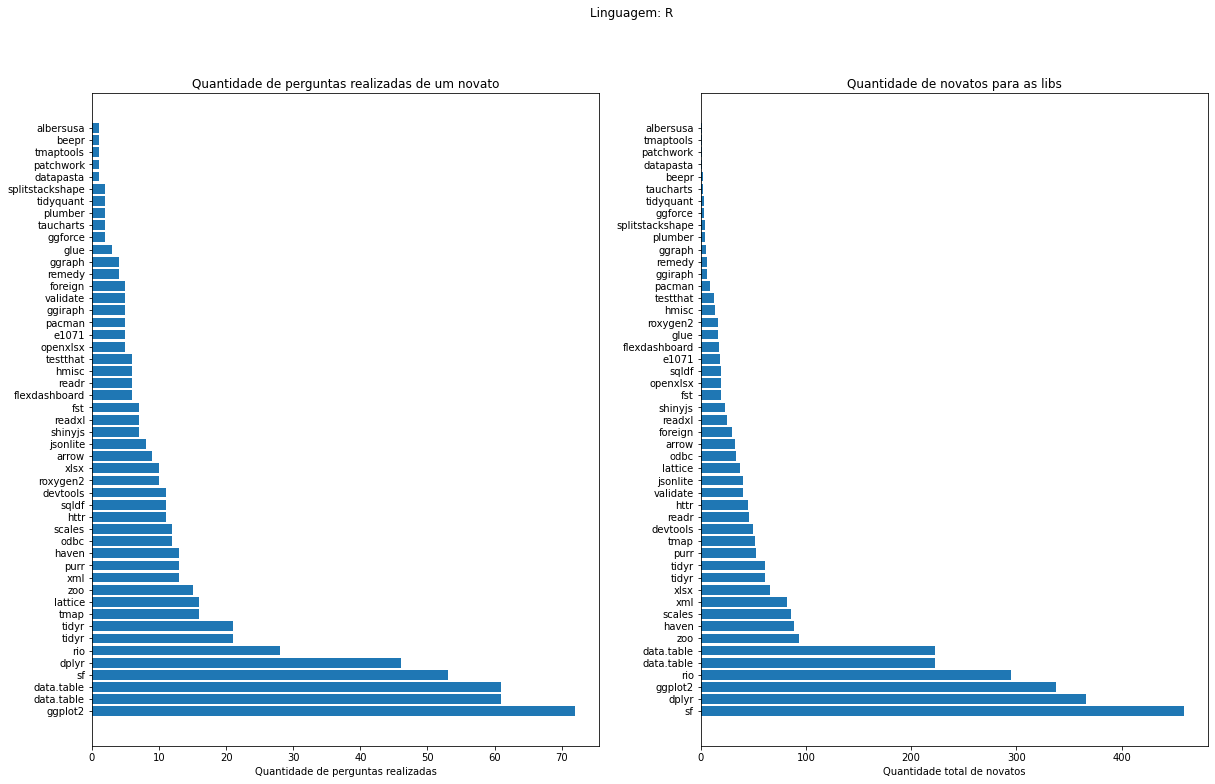

In [15]:
dataResult = dataResult.sort_values(by=['qtd_max_ptgn'])

fig, axs = plt.subplots(1, 2)
fig.suptitle("Linguagem: R")

fig.set_figheight(12)
fig.set_figwidth(20)

y_pos = np.arange(len(labelRepeat))

axs[0].barh(y_pos, dataResult['qtd_max_ptgn'].values.tolist(), align='center')
axs[0].set_yticks(y_pos, labels=dataResult['lib'].values.tolist())
axs[0].invert_yaxis()
axs[0].set_title('Quantidade de perguntas realizadas de um novato')
axs[0].set_xlabel('Quantidade de perguntas realizadas')

dataResult = dataResult.sort_values(by=['qtd_max_newers'])
y_pos = np.arange(len(labelRepeat))

axs[1].barh(y_pos, dataResult['qtd_max_newers'].values.tolist(), align='center')
axs[1].set_yticks(y_pos, labels=dataResult['lib'].values.tolist())
axs[1].invert_yaxis()
axs[1].set_title('Quantidade de novatos para as libs')
axs[1].set_xlabel('Quantidade total de novatos')

fig.savefig('./result/{}/0. plot_togheter.png'.format(prefix), dpi=100)
plt.show()

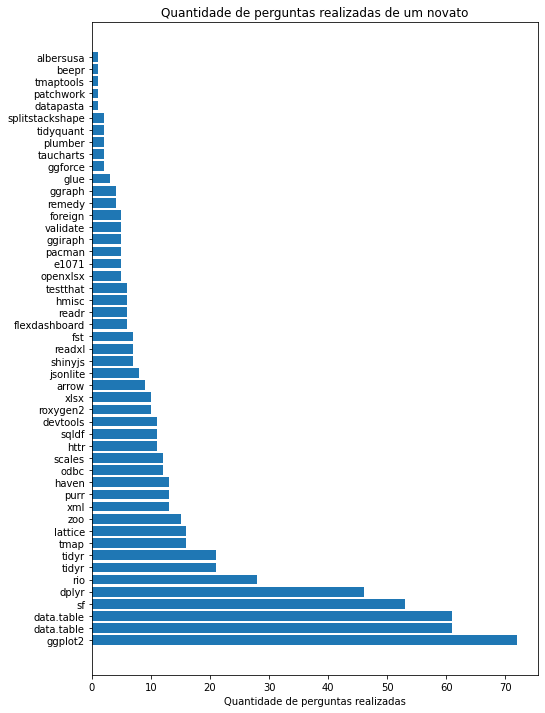

In [15]:
idxFigure = 1 
dataResult = dataResult.sort_values(by=['qtd_max_ptgn'])

fig, ax = plt.subplots(figsize=(8, 12))

y_pos = np.arange(len(labelRepeat))

ax.barh(y_pos, dataResult['qtd_max_ptgn'].values.tolist(), align='center')
ax.set_yticks(y_pos, labels=dataResult['lib'].values.tolist())
ax.invert_yaxis()
ax.set_title('Quantidade de perguntas realizadas de um novato')
ax.set_xlabel('Quantidade de perguntas realizadas')

fig.savefig('./result/{}/{}. qtd_max.png'.format(prefix, idxFigure), dpi=100)

plt.show()
idxFigure+=1

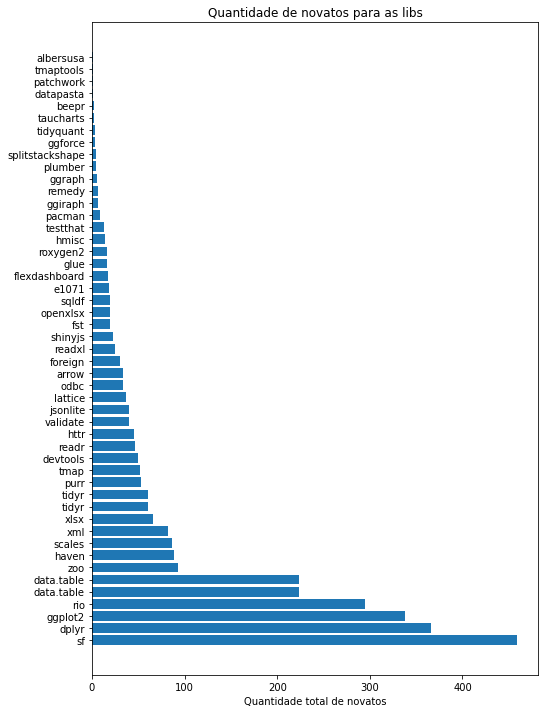

In [16]:
idxFigure = 2
dataResult = dataResult.sort_values(by=['qtd_max_newers'])

fig, ax = plt.subplots(figsize=(8, 12))

y_pos = np.arange(len(labelRepeat))

ax.barh(y_pos, dataResult['qtd_max_newers'].values.tolist(), align='center')
ax.set_yticks(y_pos, labels=dataResult['lib'].values.tolist())
ax.invert_yaxis()
ax.set_title('Quantidade de novatos para as libs')
ax.set_xlabel('Quantidade total de novatos')

fig.savefig('./result/{}/{}. qtd_total.png'.format(prefix, idxFigure), dpi=100)

plt.show()
idxFigure+=1

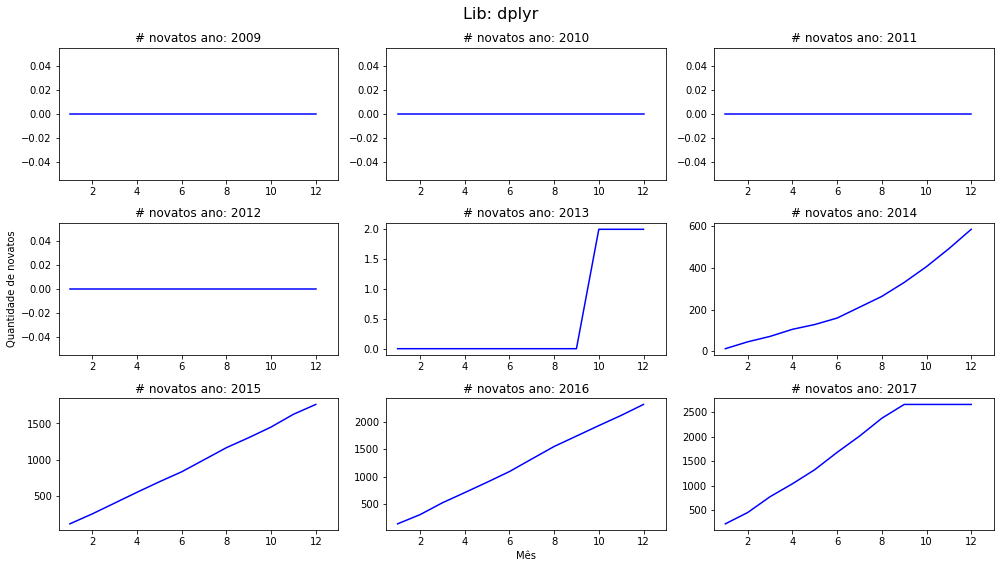

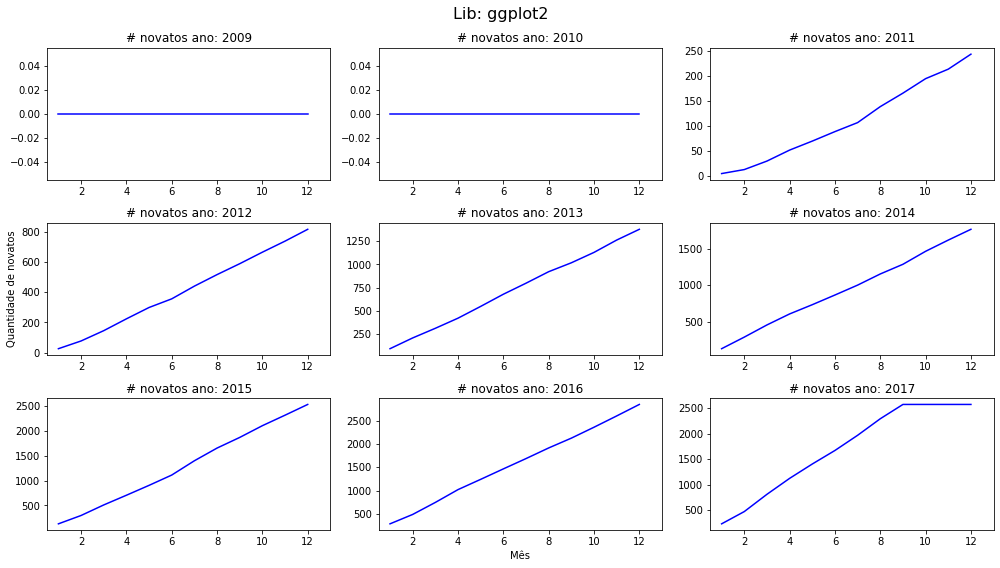

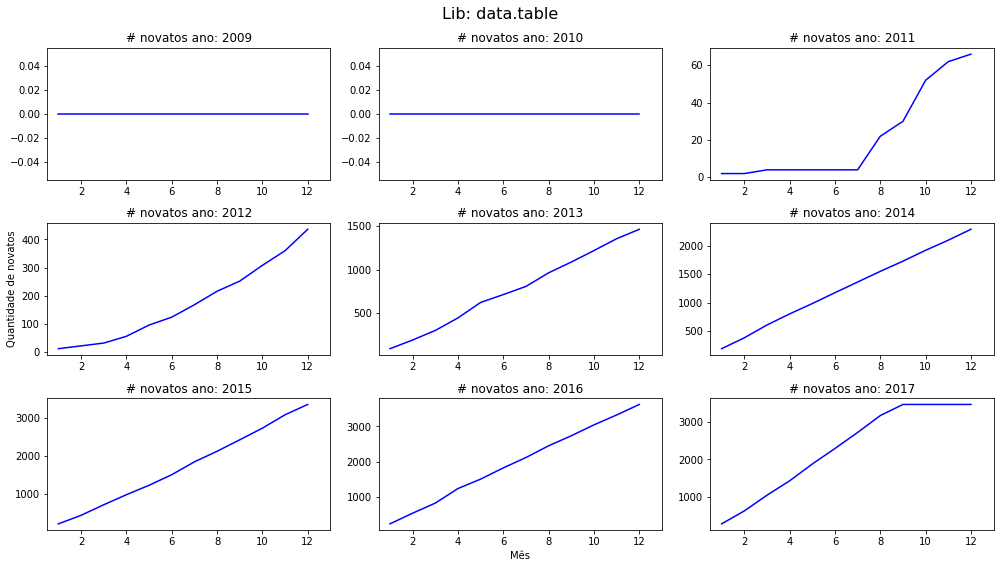

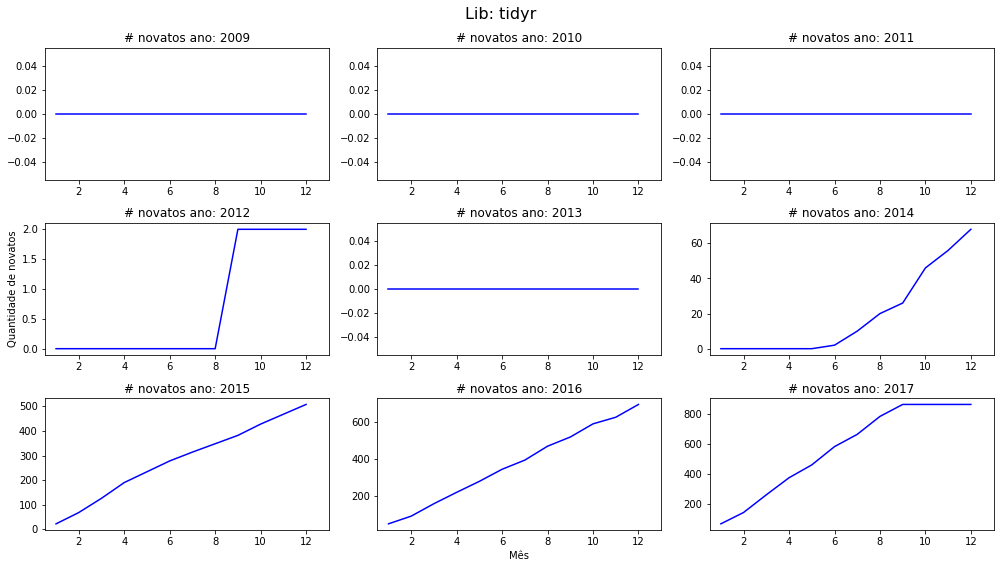

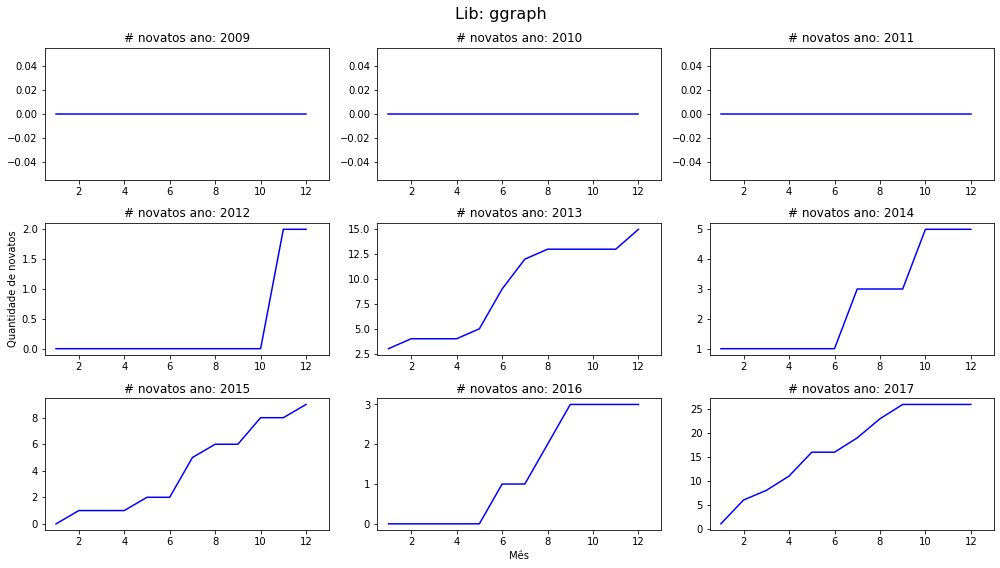

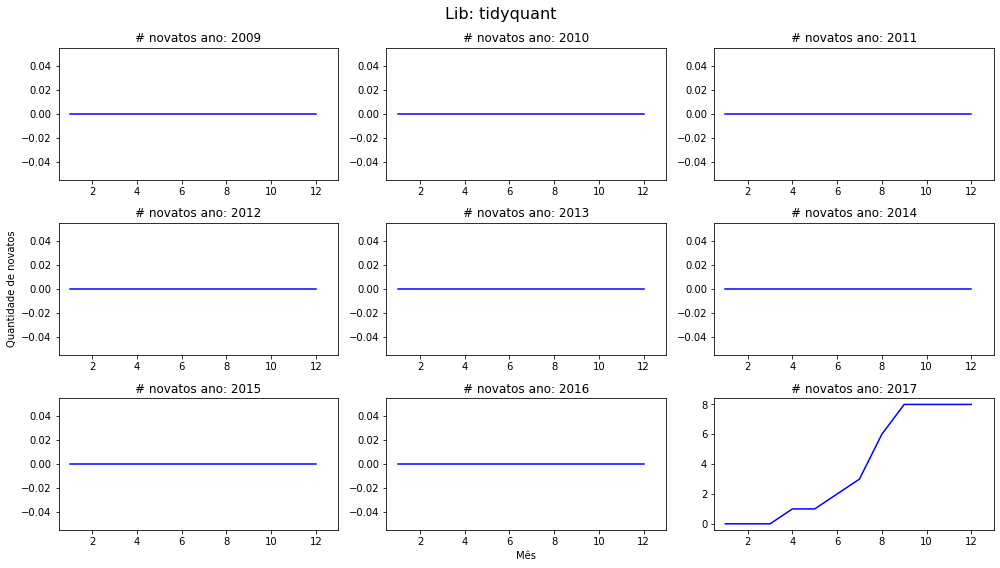

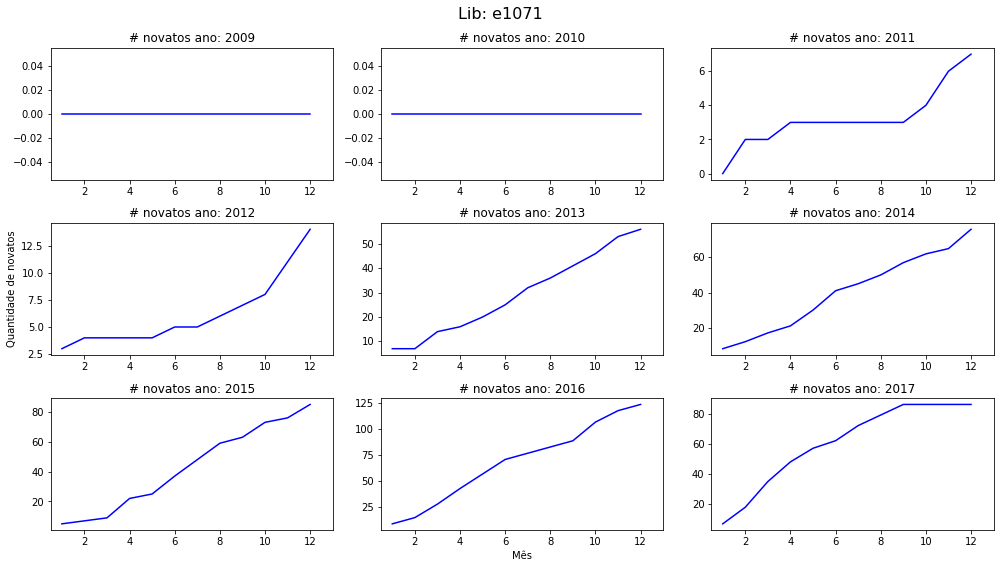

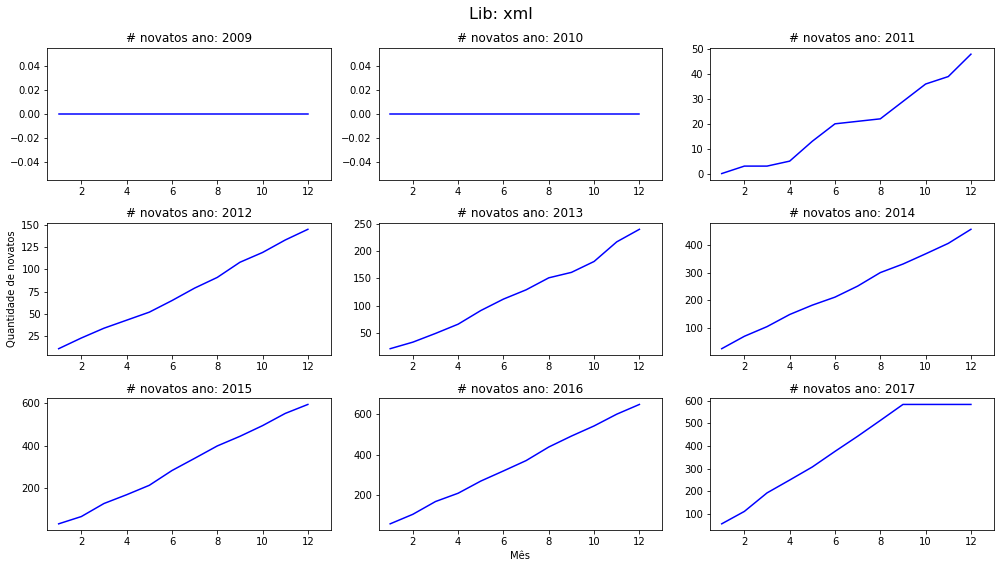

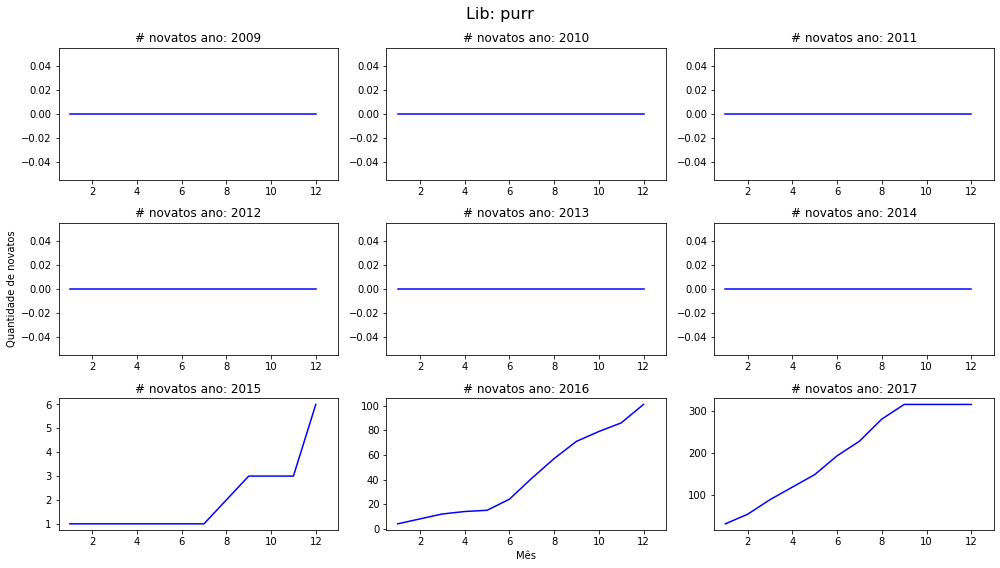

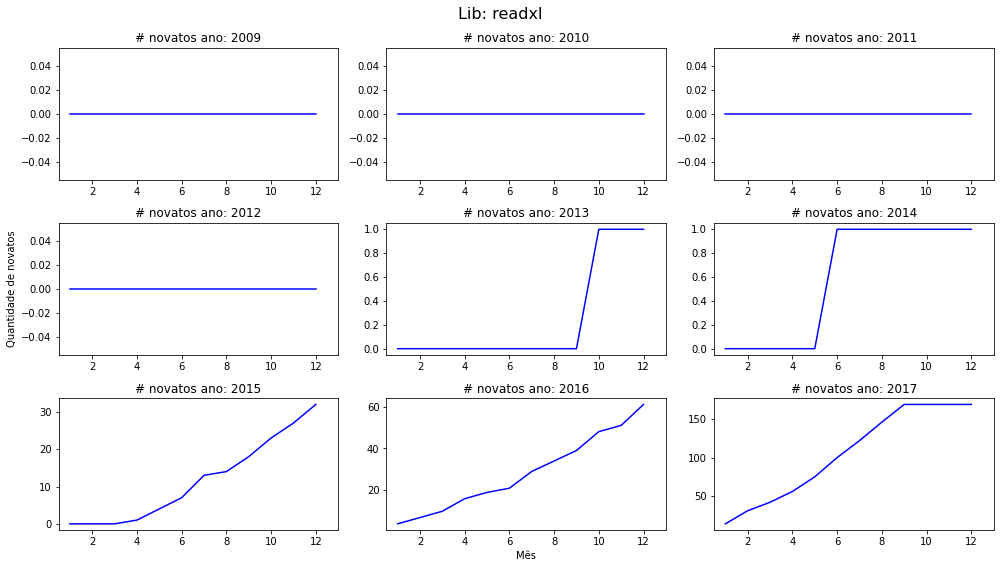

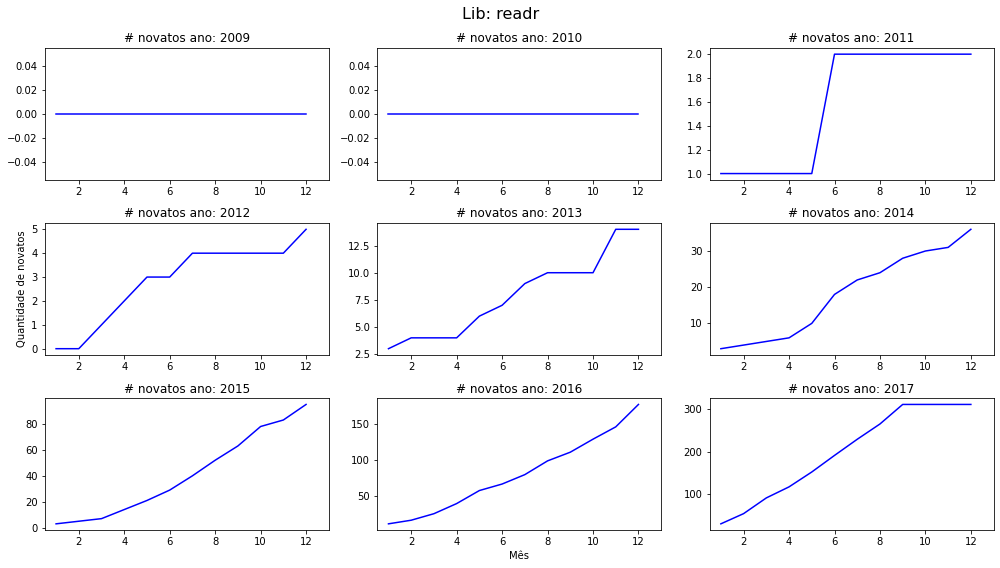

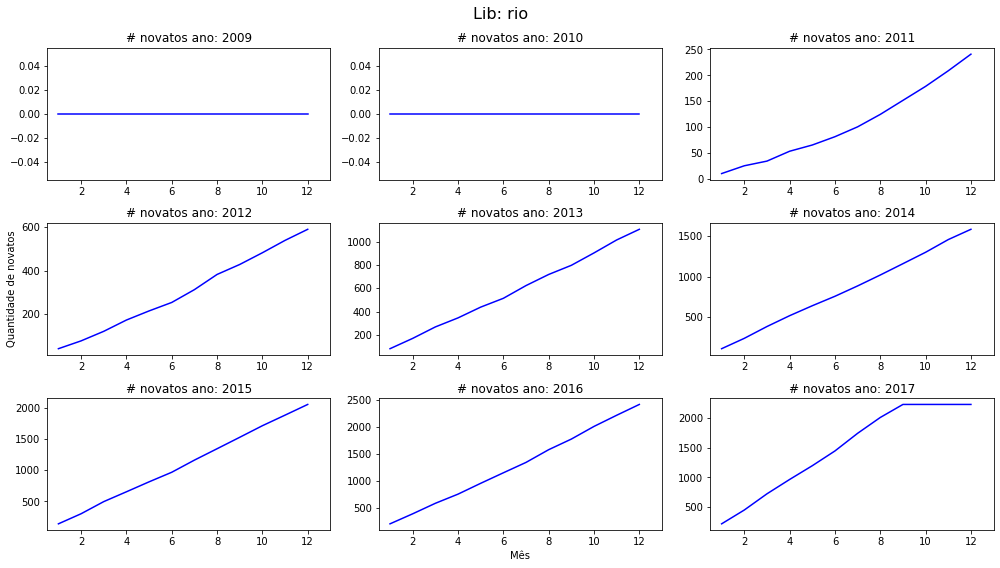

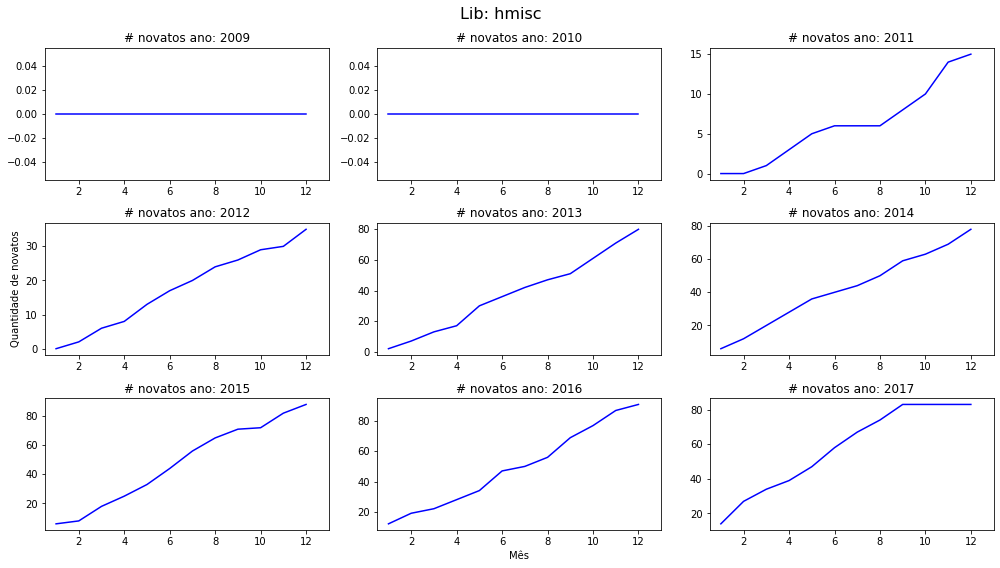

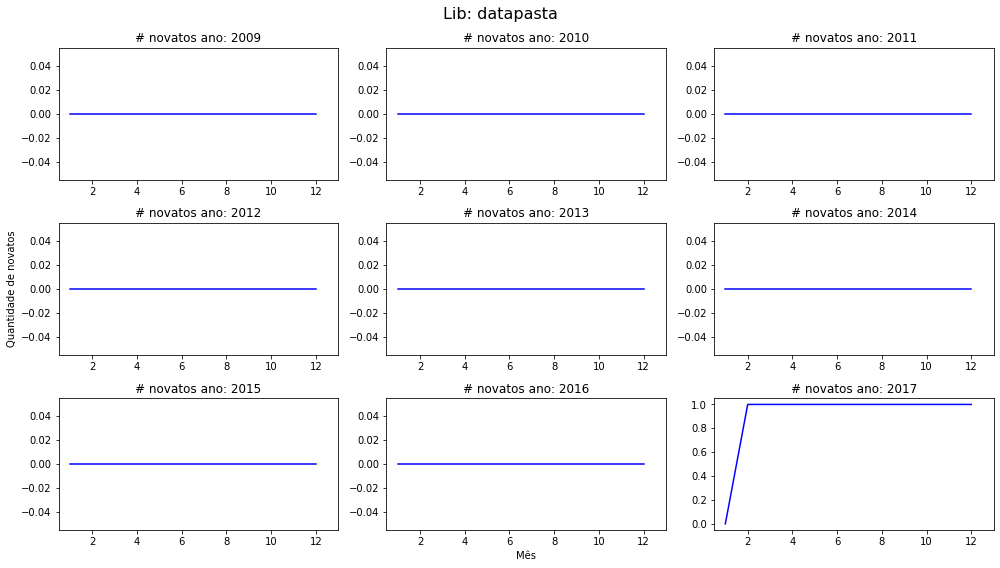

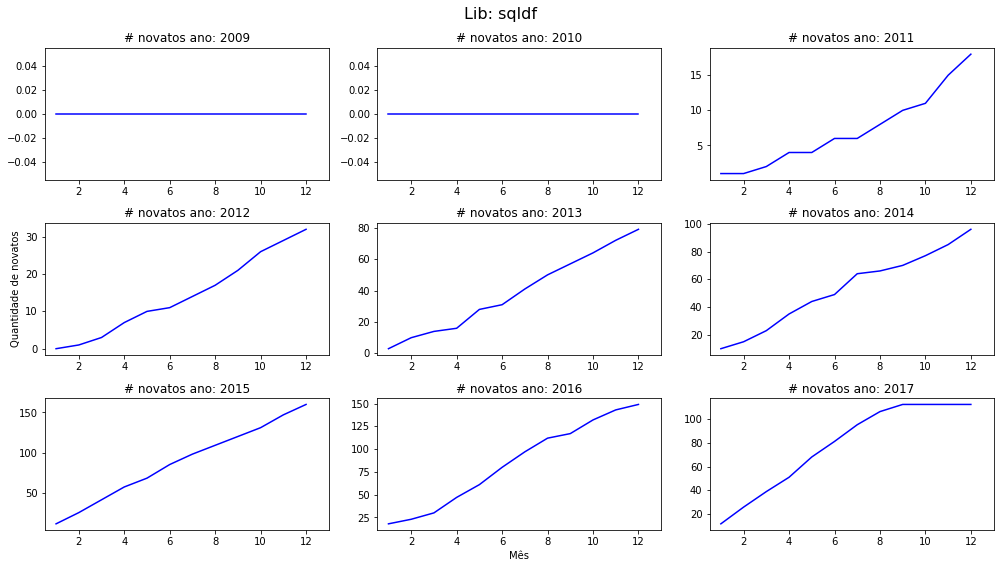

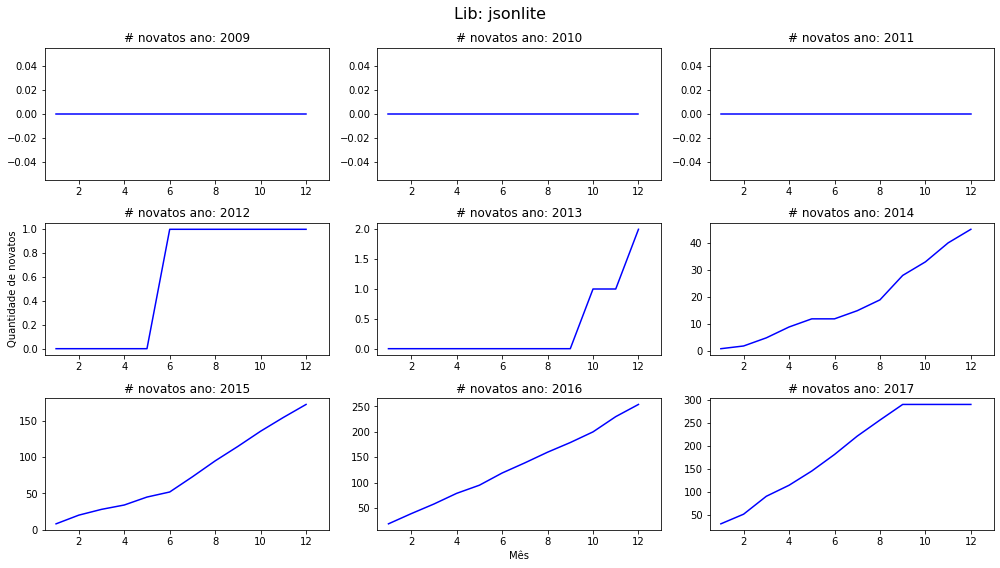

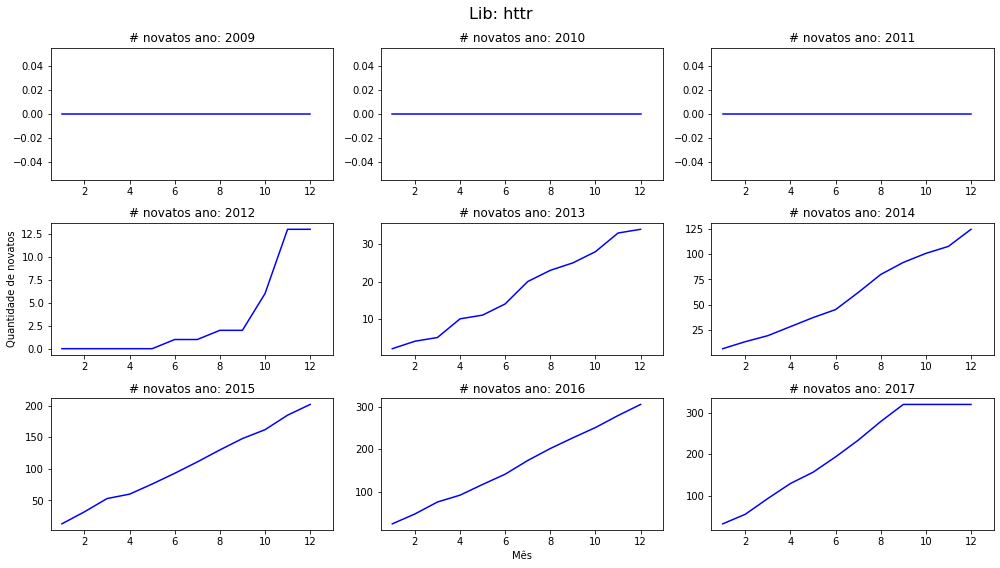

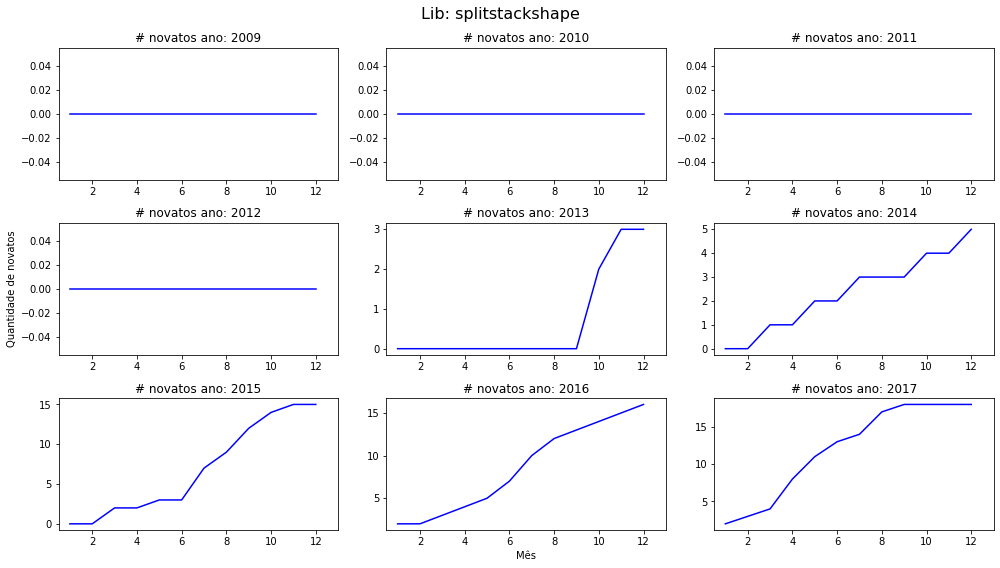

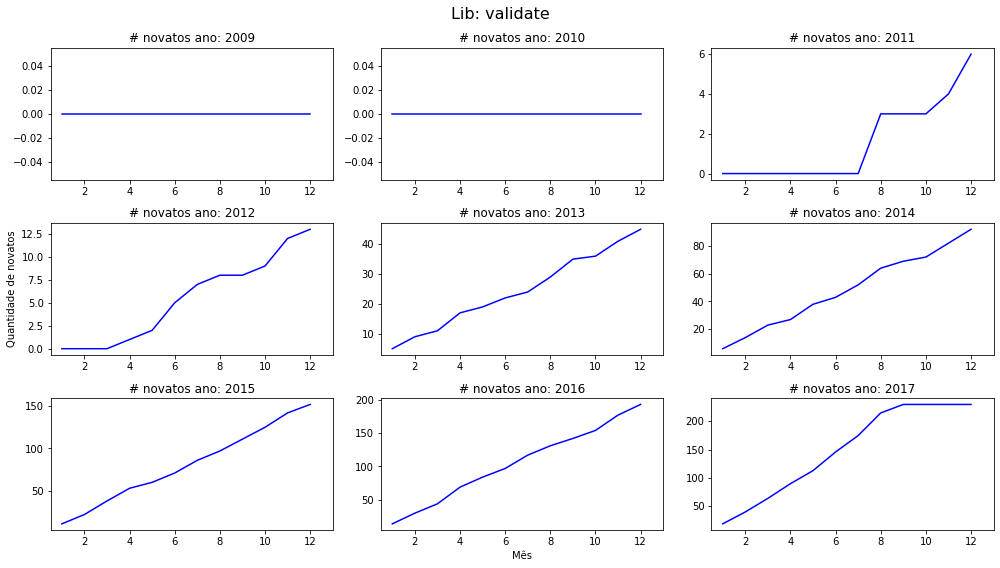

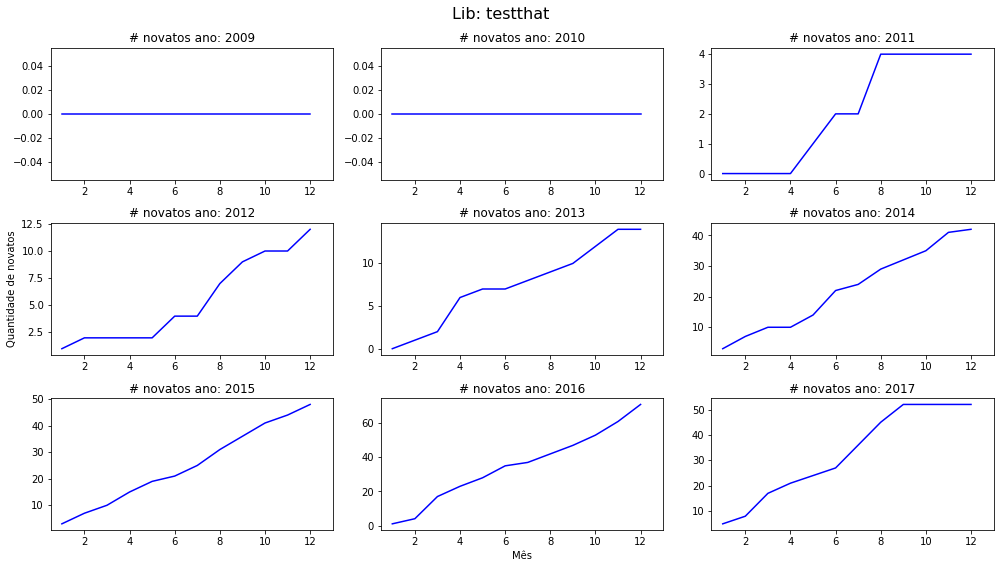

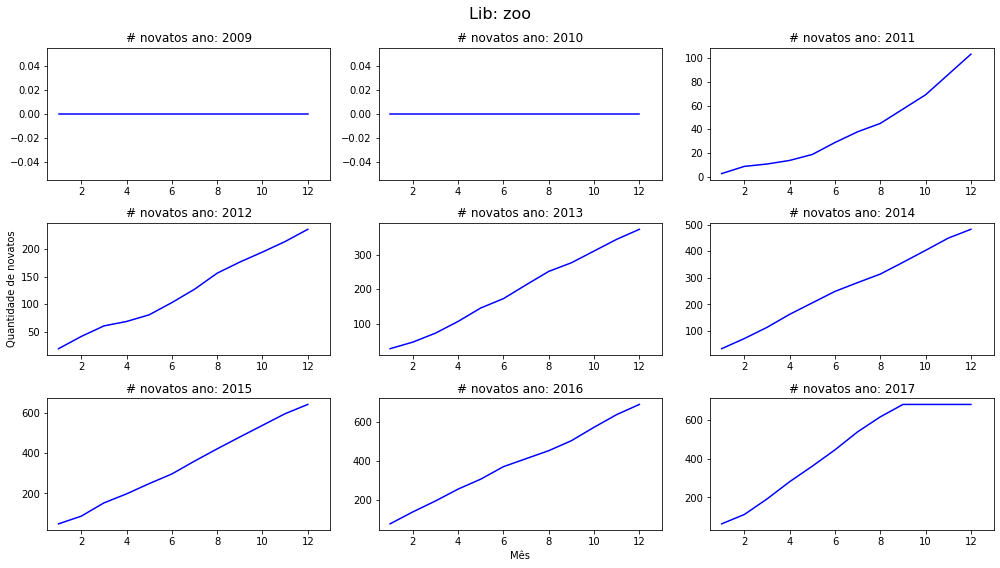

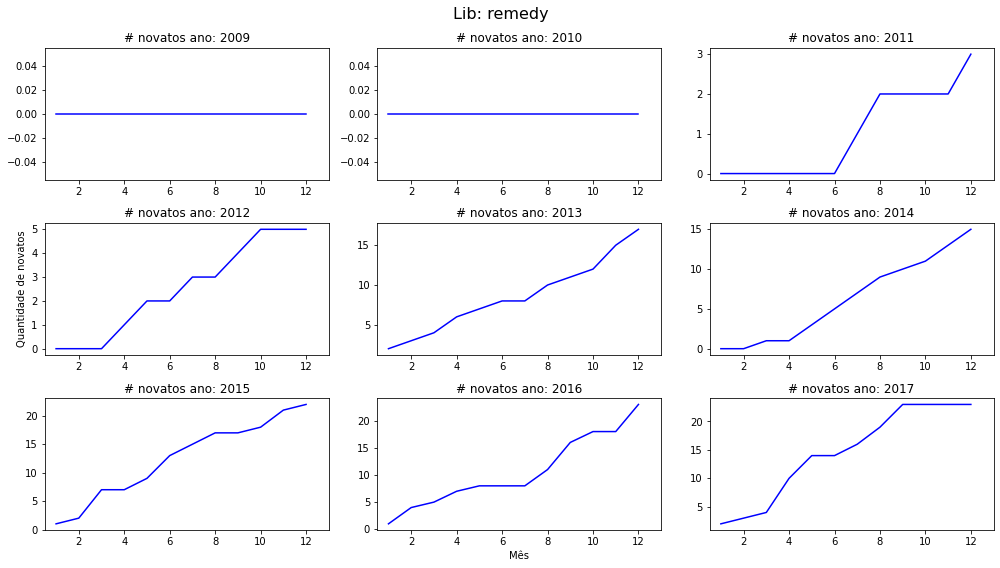

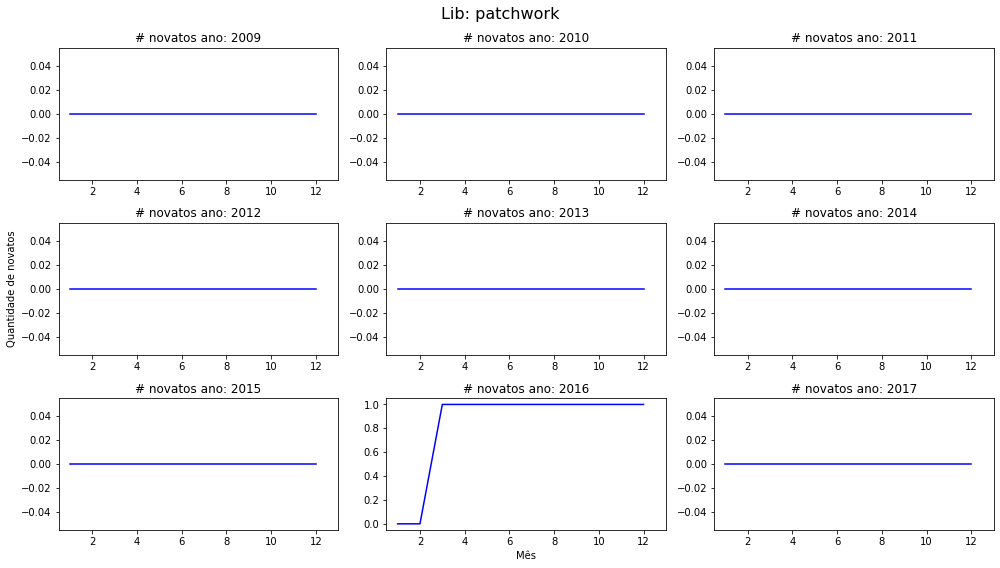

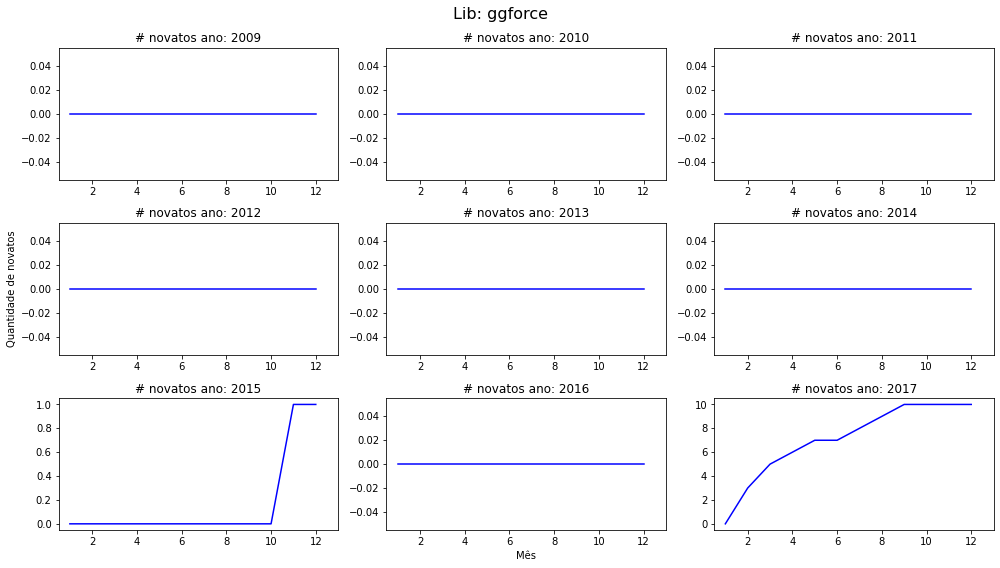

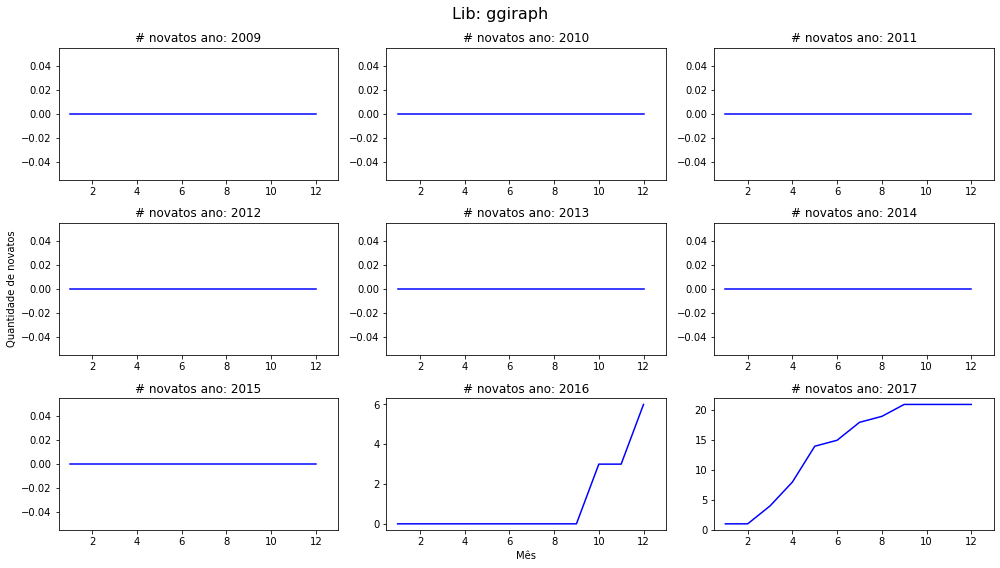

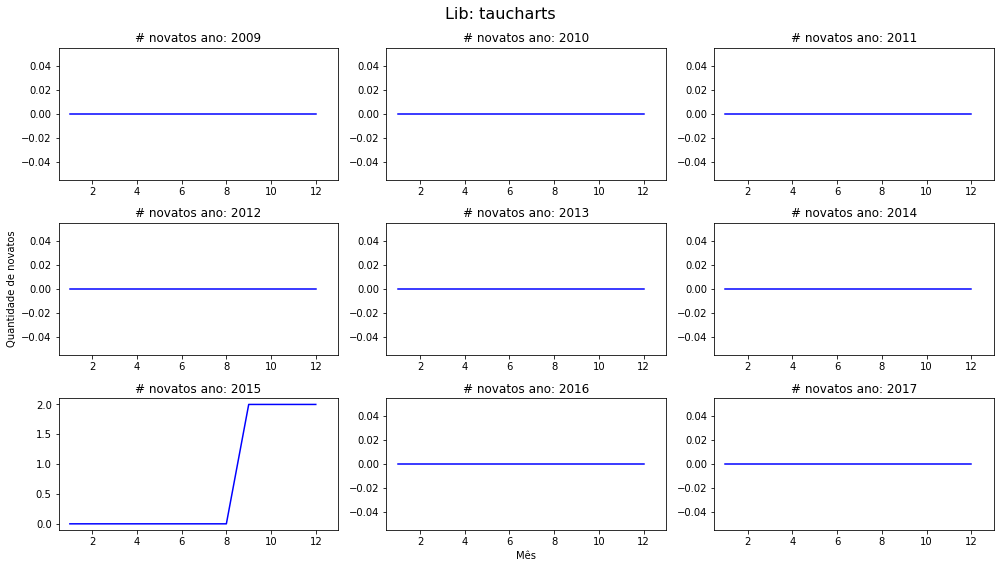

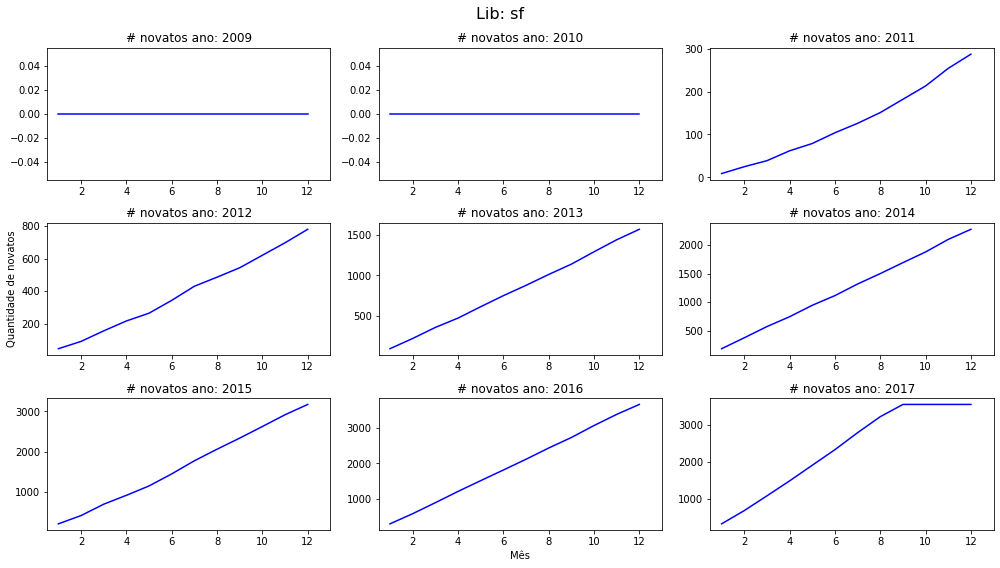

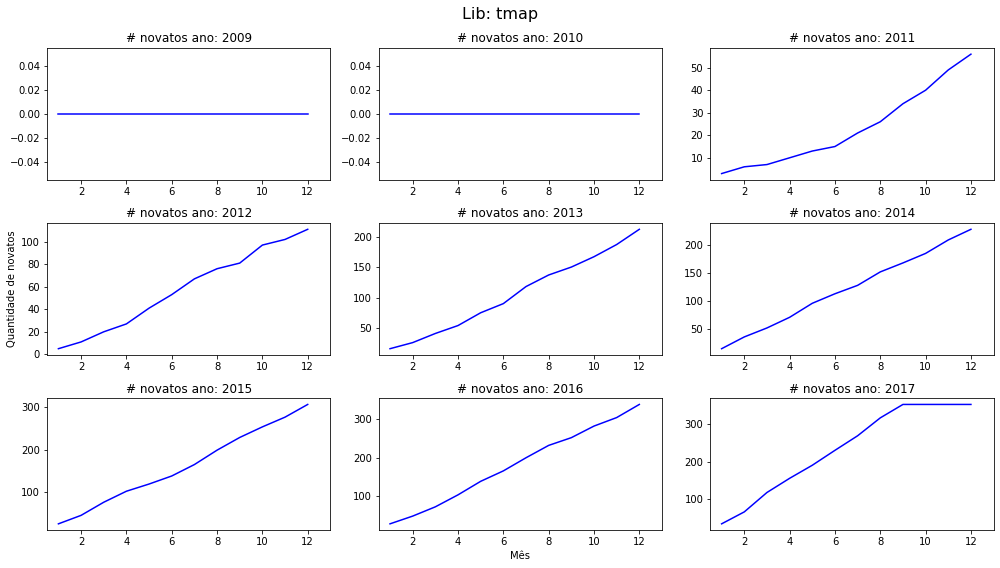

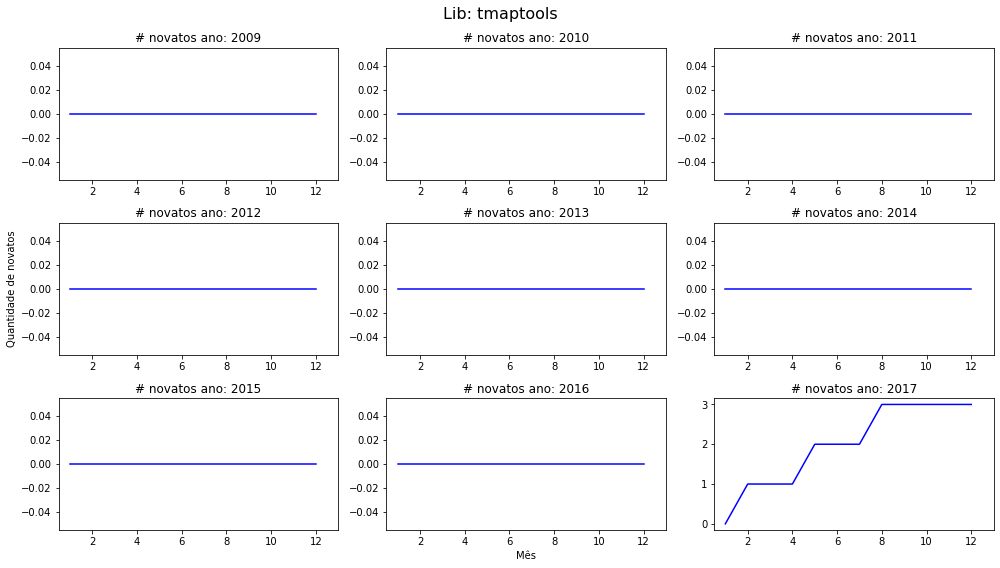

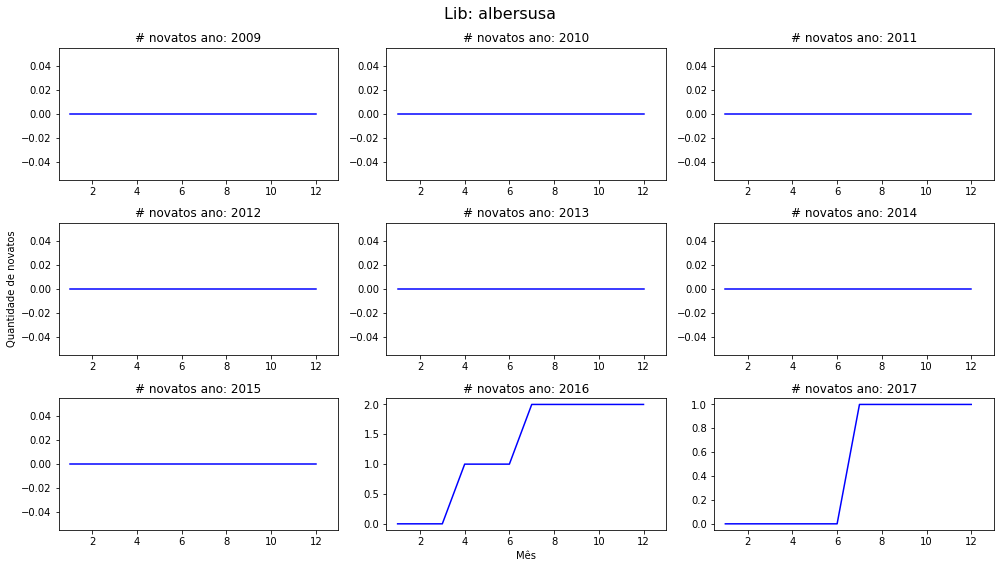

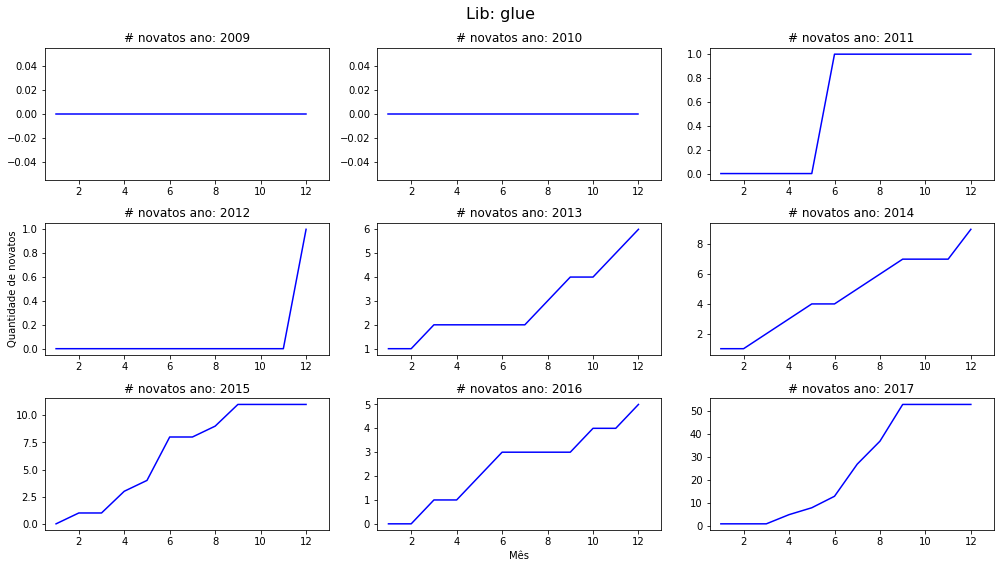

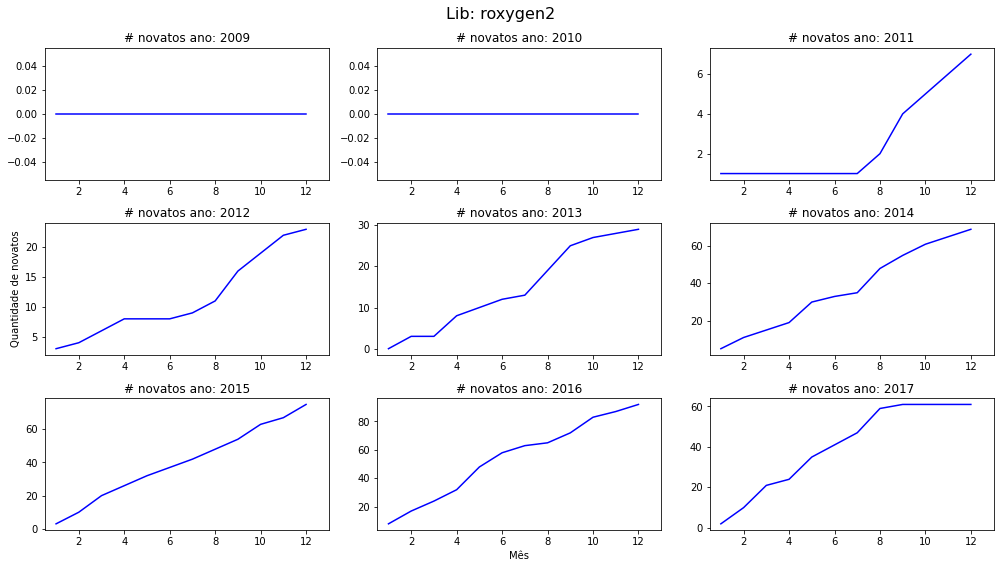

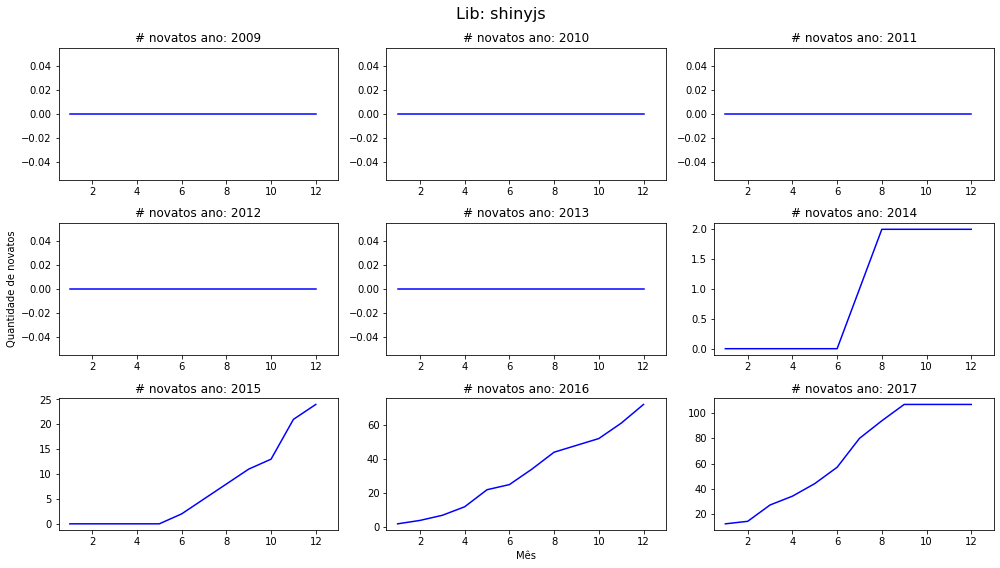

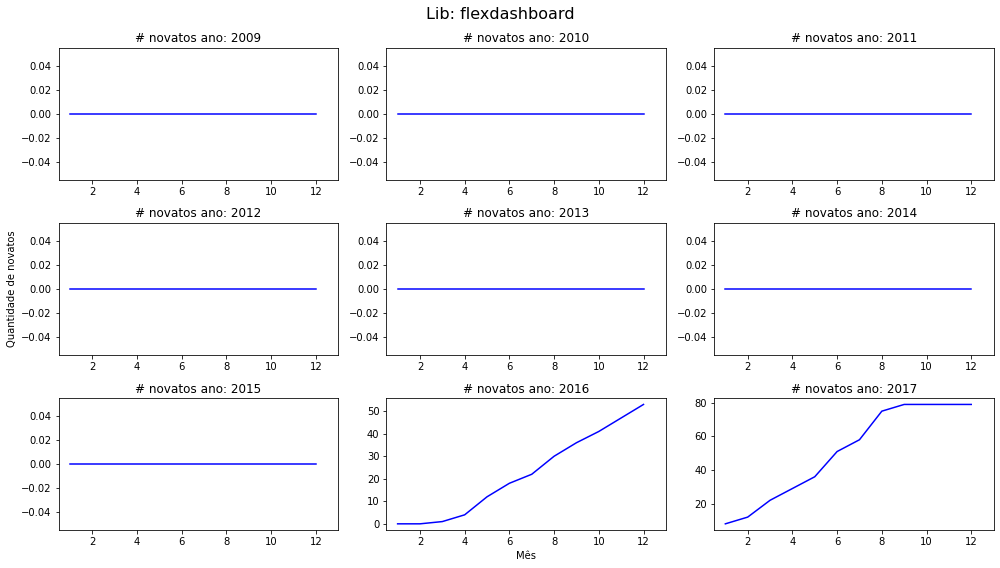

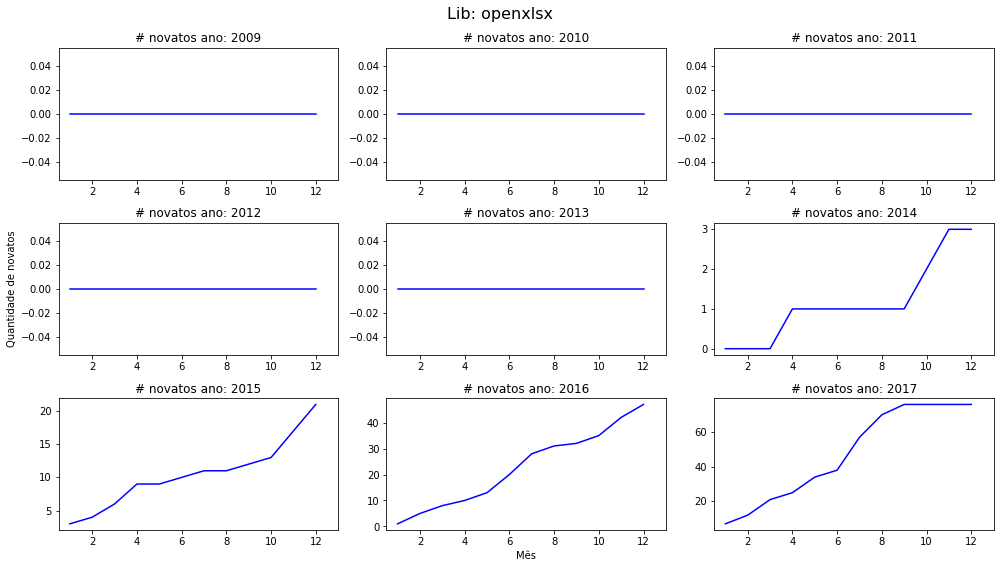

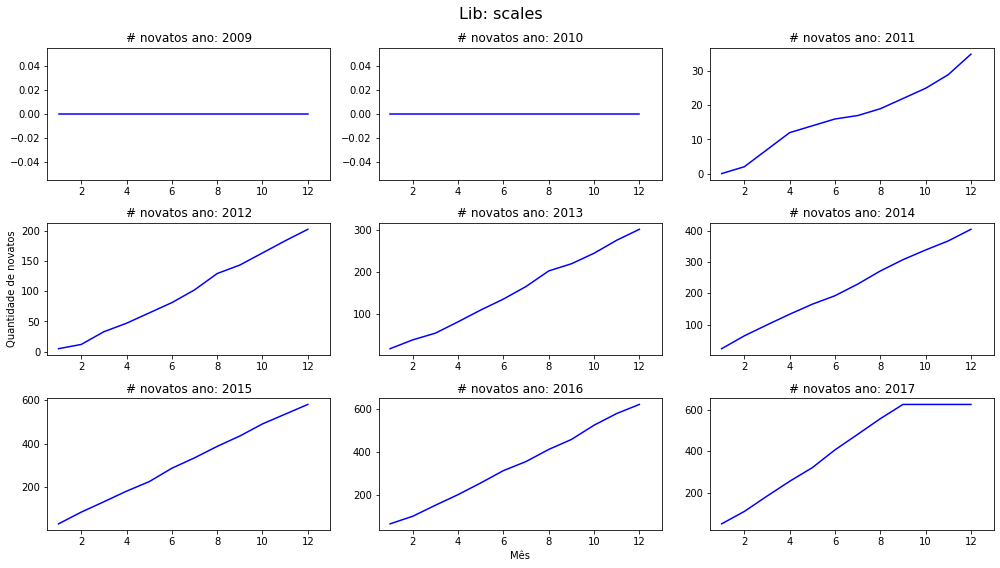

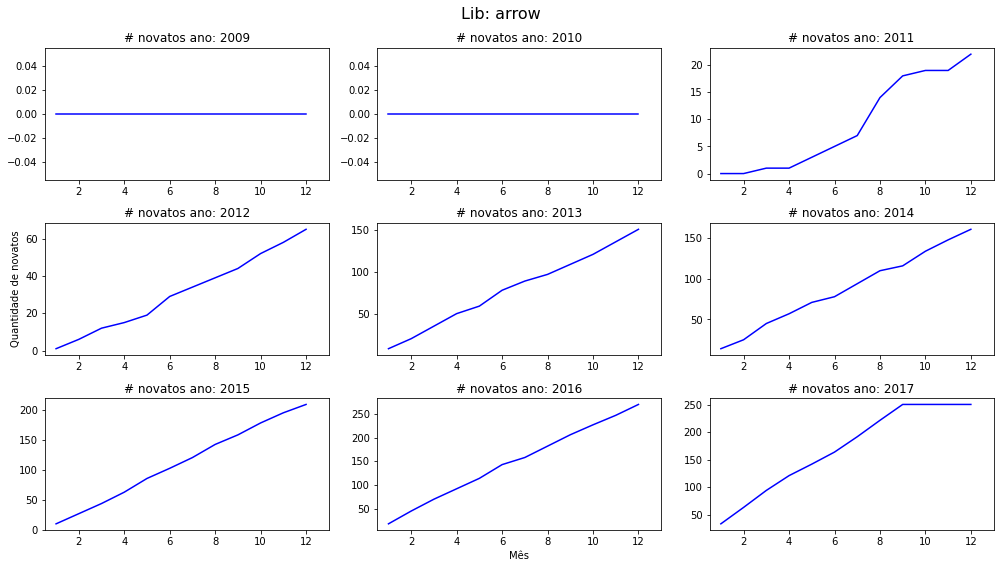

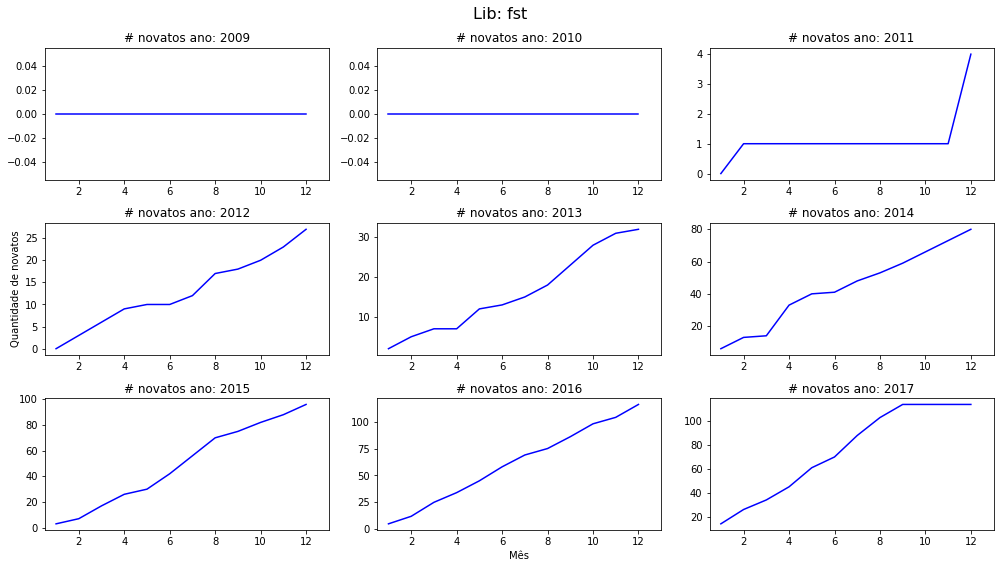

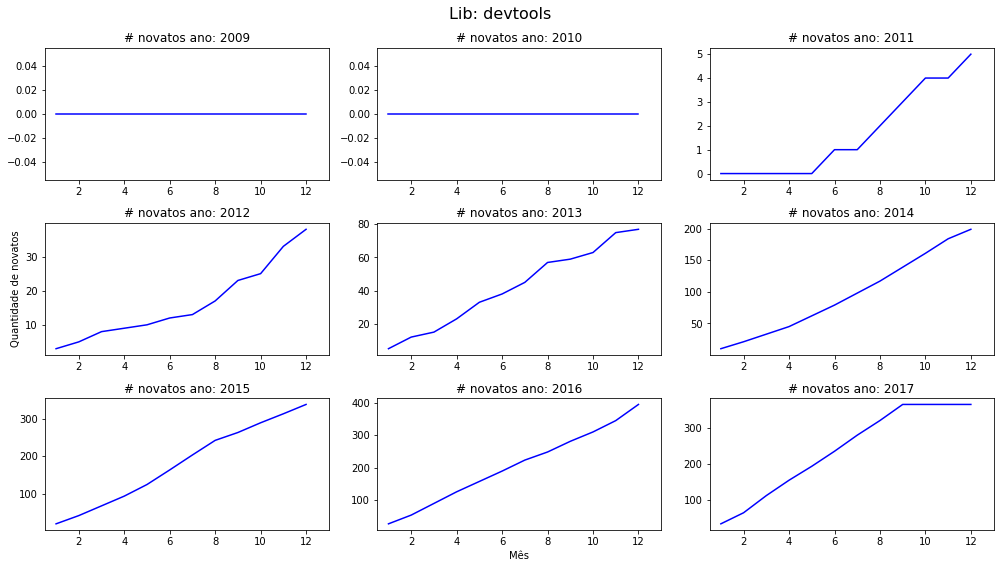

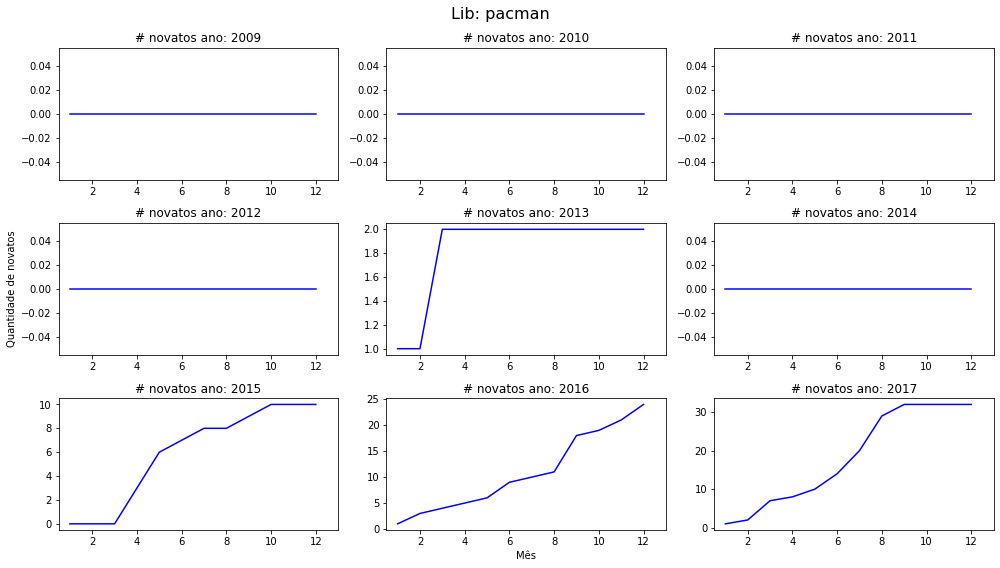

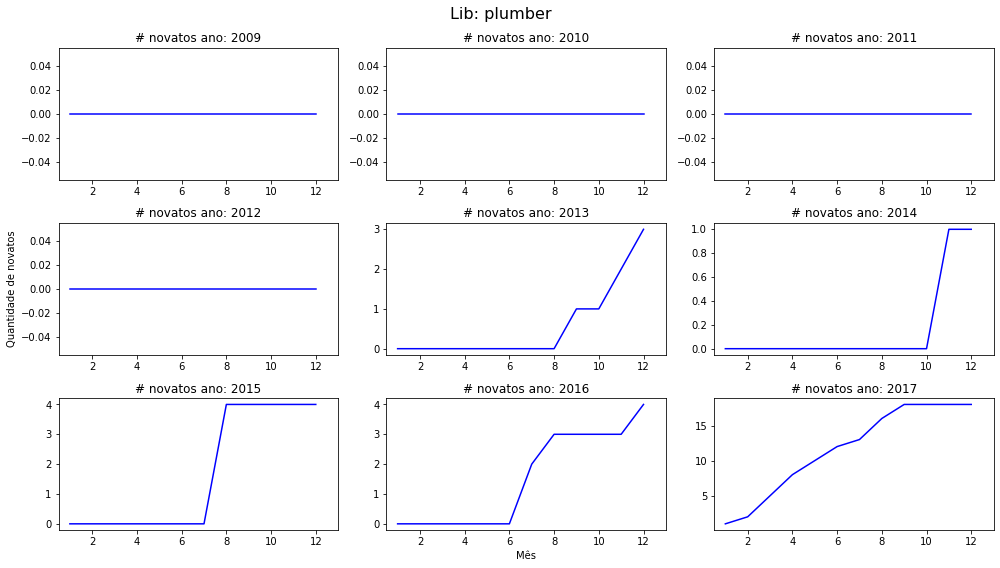

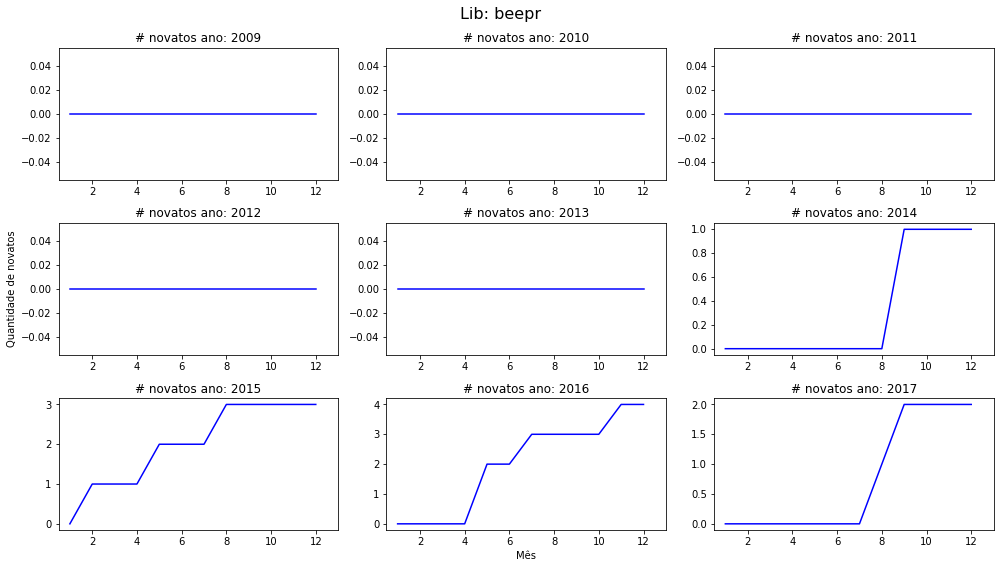

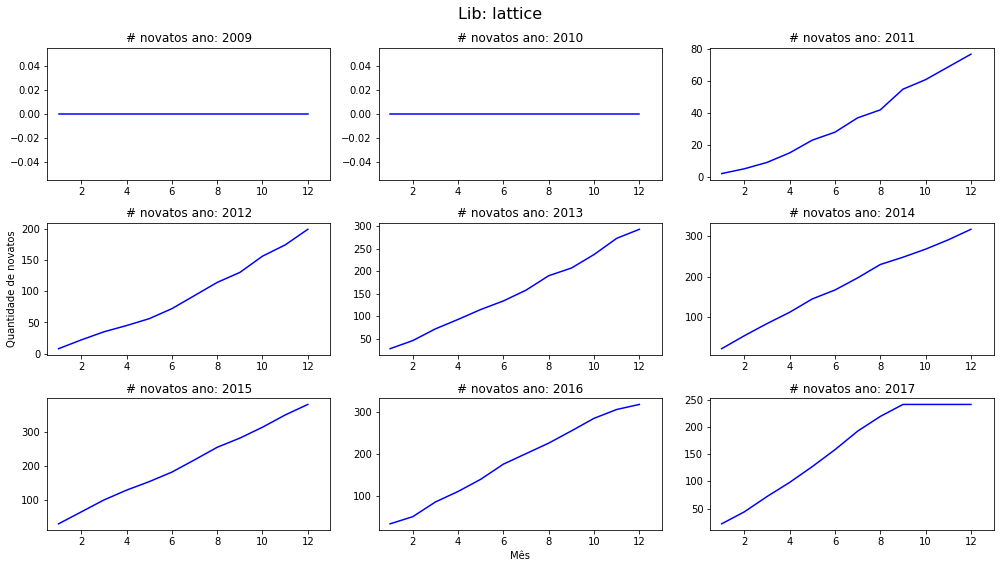

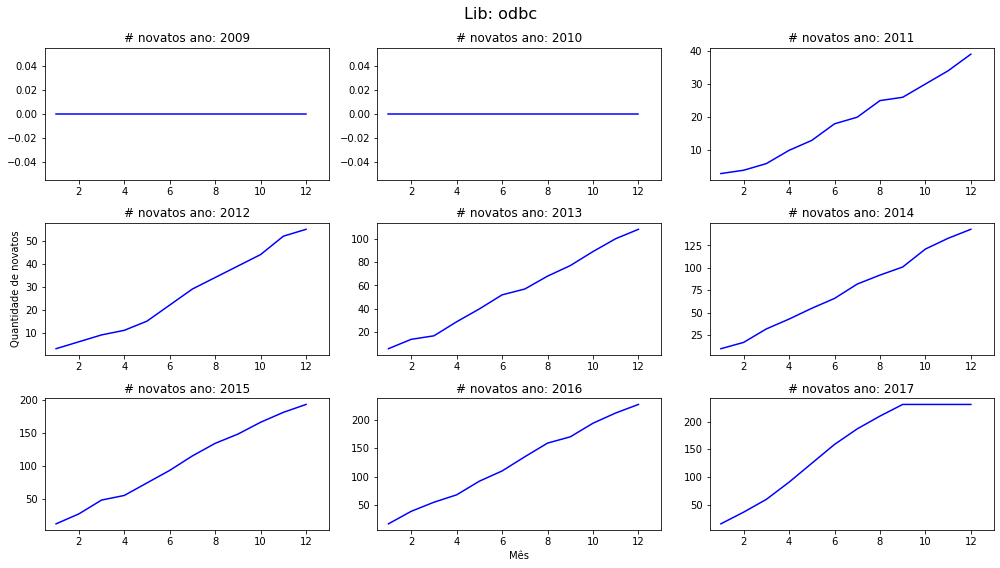

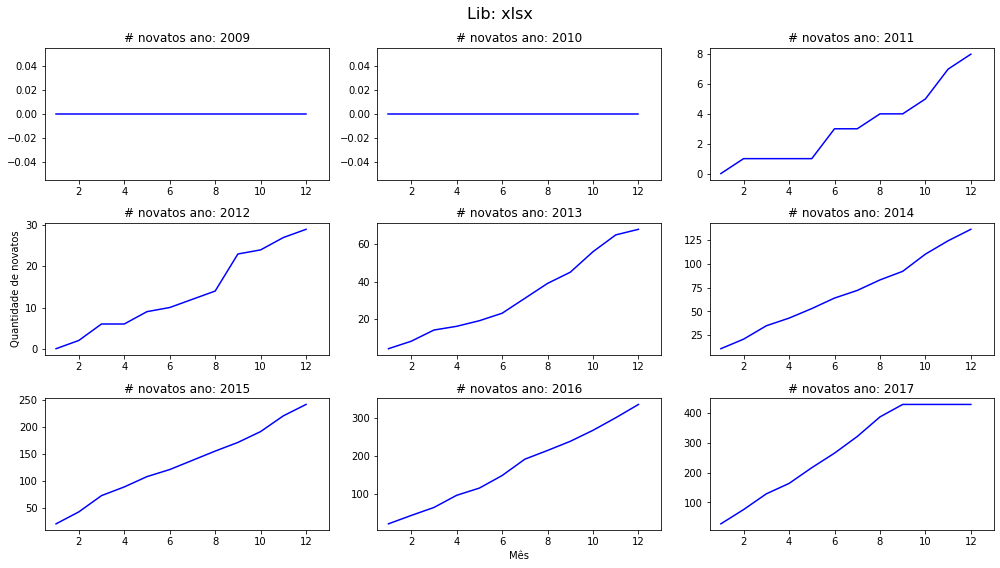

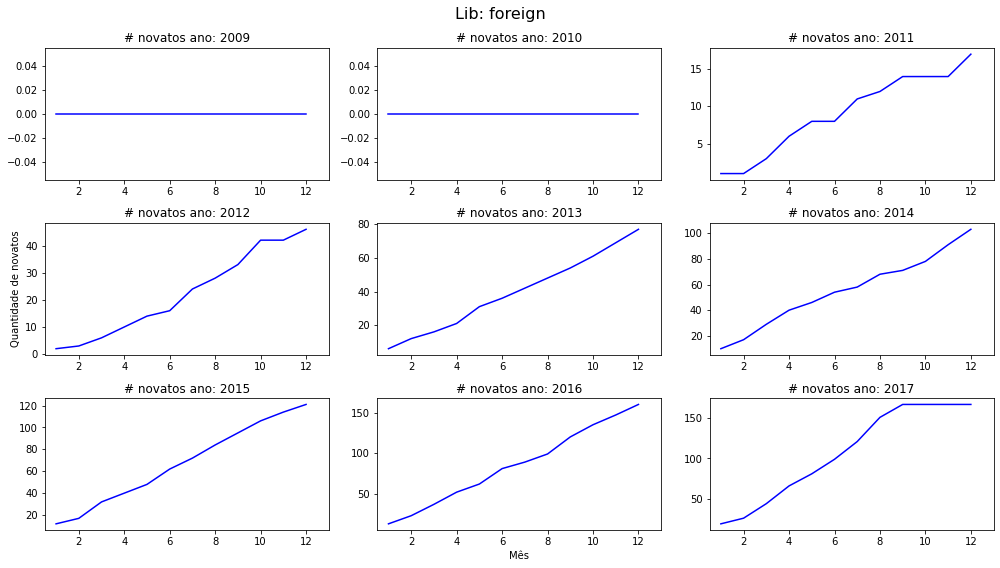

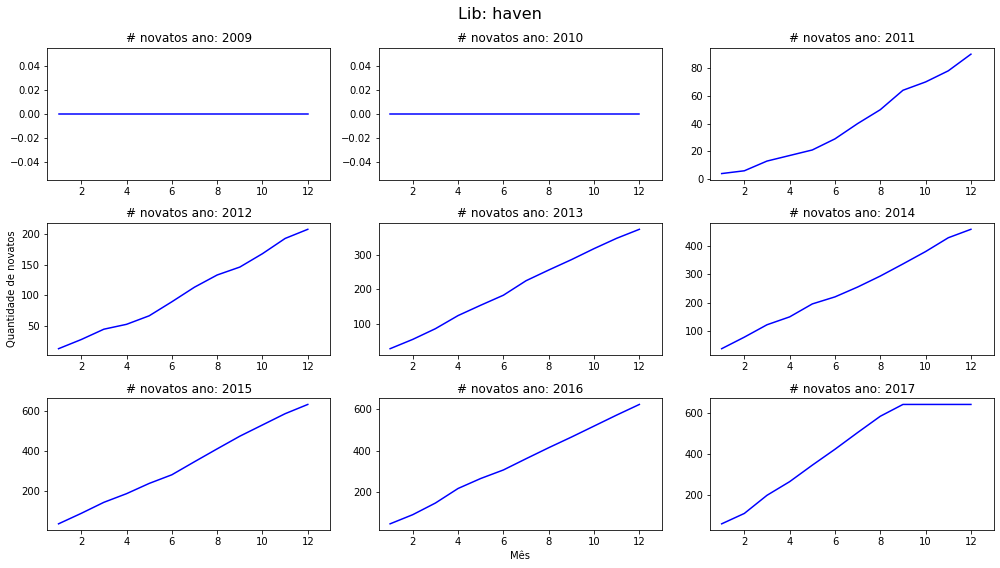

In [17]:
idxFigure = 3
libs = dataLanguage['Lib'].unique().tolist()

for lib in libs:
    dataLib = dataLanguage.loc[dataLanguage['Lib'] == lib]
    anos = dataLib['Year'].unique().tolist()
    fig, axs = plt.subplots(3, 3)
    fig.suptitle("Lib: " + lib, fontsize=16)
    fig.set_figwidth(14)
    fig.set_figheight(8)
    idxX = 0
    idxY = 0

    totalBckp = 0

    for ano in anos:
        dataLanguageAno = dataLib.loc[dataLib['Year'] == ano]
        y = sc.returnY(len(dataLanguageAno['Month'].unique().tolist()))
        x = []

        for mes in dataLanguageAno['Month'].unique().tolist():
            dataLanguageMes = dataLanguageAno.loc[dataLanguageAno['Month'] == mes]

            try:
                valueNewCommers = x[-1]
            except:
                valueNewCommers = 0
                # valueNewCommers = totalBckp

            valueNewCommers += dataLanguageMes['NewCommers'].sum()
            totalBckp += dataLanguageMes['NewCommers'].sum()
            x.append(valueNewCommers)

        axs[idxX][idxY].plot(y, x, color='blue')
        
        axs[idxX][idxY].set_title('# novatos ano: {}'.format(ano))

        if idxX == 1 and idxY == 0:
            axs[idxX][idxY].set_ylabel('Quantidade de novatos')
        
        if idxX == 2 and idxY == 1:
            axs[idxX][idxY].set_xlabel('Mês')
        
        axs[idxX][idxY].set_xlim(0.5, 13)

        # plt.ylim(x[0], x[-1] + 10)
        # plt.xlim(-1, 13)
        # plt.title('# novatos por mês para a lib {} no ano {}'.format(lib, ano))
        # plt.ylabel('Quantidade de novatos')
        # plt.xlabel('Mês')
        # plt.show()

        idxY += 1

        if idxY == 3:
            idxY = 0
            idxX += 1
        
    fig.tight_layout()
    plt.show()

    fig.savefig('result/{}/{}. {}_newcommers_years.png'.format(prefix, idxFigure, lib), dpi=fig.dpi, bbox_inches='tight')
    idxFigure += 1